In [1]:
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC
from sklearn.model_selection import train_test_split 
import glob
import pathlib
from keras.applications.vgg16 import VGG16

In [2]:
pic_path=pathlib.Path(r"C:\Users\arunf\Data Science\MASK DATASET (2)\Face Mask Dataset\Train")

In [3]:
with_mask=list(pic_path.glob('WithMask/*'))
without_mask=list(pic_path.glob('WithoutMask/*'))

In [4]:
pic_dict={'With Mask':with_mask,'Without Mask':without_mask}

In [5]:
pic_class={'With Mask':0,'Without Mask':1}

In [6]:
x=[]
y=[]

In [7]:
for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(100,100))
        img=img/225
        x.append(img)
        y.append(pic_class[i])

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
print(x.shape)
print(y.shape)

(10000, 100, 100, 3)
(10000,)


In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from tensorflow.keras import layers
data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(100,100,3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        
    ])

In [13]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(100,100,3)
)


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [15]:
model=Sequential()
model.add(data_augmentation)
model.add(conv_base)

# model.add(Conv2D(filters=180,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=150,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=120,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=75,kernel_size=(3,3,),input_shape=(100,100,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 180)               829620    
                                                                 
 dense_1 (Dense)             (None, 150)               27150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 80)               

In [16]:
conv_base.trainable = False

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 180)               829620    
                                                                 
 dense_1 (Dense)             (None, 150)               27150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 80)               

In [18]:
model.compile(optimizer='adam',loss=SCC(),metrics=['accuracy'])

In [19]:
import tensorflow
callback = tensorflow.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [20]:
hist=model.fit(xtrain,ytrain,epochs=7,validation_data=(xtest,ytest),callbacks=[callback])

Epoch 1/7
219/219 [==============================] - 141s 630ms/step - loss: 0.0804 - accuracy: 0.9681 - val_loss: 0.0249 - val_accuracy: 0.9907
Epoch 2/7
219/219 [==============================] - 137s 628ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0210 - val_accuracy: 0.9917
Epoch 3/7
219/219 [==============================] - 146s 666ms/step - loss: 0.0292 - accuracy: 0.9887 - val_loss: 0.0203 - val_accuracy: 0.9927
Epoch 4/7
219/219 [==============================] - 144s 660ms/step - loss: 0.0211 - accuracy: 0.9924 - val_loss: 0.0151 - val_accuracy: 0.9933
Epoch 5/7
219/219 [==============================] - 147s 673ms/step - loss: 0.0282 - accuracy: 0.9890 - val_loss: 0.0145 - val_accuracy: 0.9940
Epoch 6/7
219/219 [==============================] - 136s 623ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0147 - val_accuracy: 0.9953
Epoch 7/7
219/219 [==============================] - 136s 620ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0131 - val_ac

In [21]:
model.evaluate(xtest,ytest)

94/94 [==============================] - 38s 404ms/step - loss: 0.0131 - accuracy: 0.9953


[0.01314980536699295, 0.9953333139419556]

In [22]:
his=hist.history
his

{'loss': [0.08037497103214264,
  0.038671400398015976,
  0.029181072488427162,
  0.02108454890549183,
  0.028171811252832413,
  0.02296999655663967,
  0.0152451042085886],
 'accuracy': [0.9681428670883179,
  0.9865714311599731,
  0.9887142777442932,
  0.9924286007881165,
  0.9890000224113464,
  0.9922857284545898,
  0.994857132434845],
 'val_loss': [0.024884775280952454,
  0.02100915089249611,
  0.02027384378015995,
  0.01505118515342474,
  0.01448759250342846,
  0.01468666922301054,
  0.01314980536699295],
 'val_accuracy': [0.9906666874885559,
  0.9916666746139526,
  0.9926666617393494,
  0.9933333396911621,
  0.9940000176429749,
  0.9953333139419556,
  0.9953333139419556]}

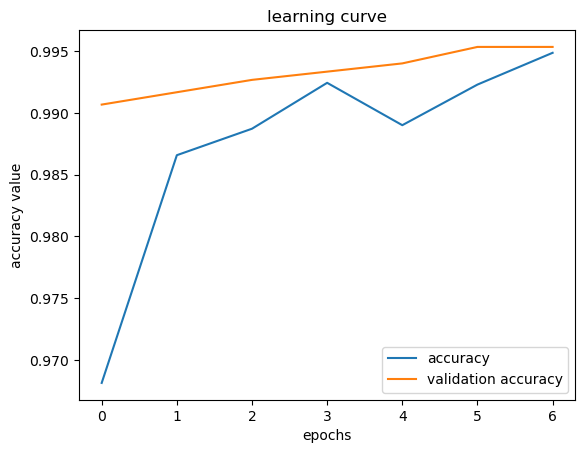

In [23]:
plt.plot(his['accuracy'],label='accuracy')
plt.plot(his['val_accuracy'],label='validation accuracy')
plt.title("learning curve")
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.legend()

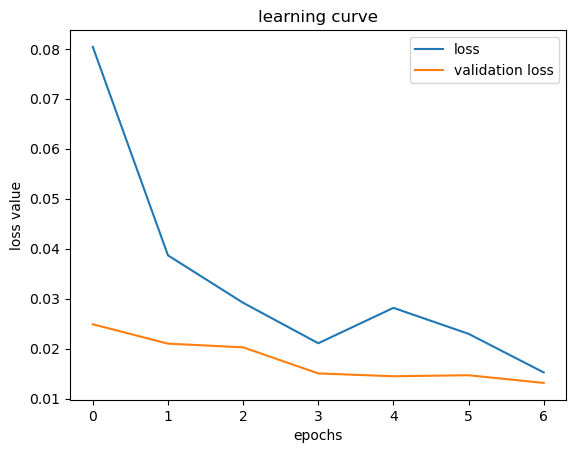

In [24]:
plt.plot(his['loss'],label='loss')
plt.plot(his['val_loss'],label='validation loss')
plt.title('learning curve')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

**PREDICTION**

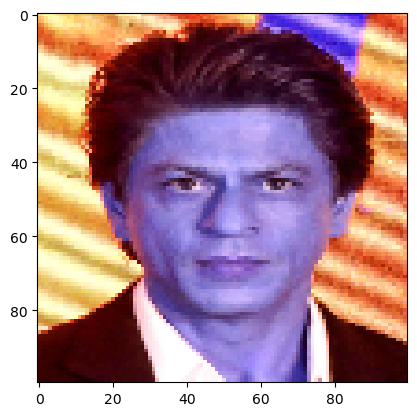

In [45]:
img=cv2.imread(r"C:\Users\arunf\Downloads\170054_v9_bb.jpg")
img=cv2.resize(img,(100,100))
plt.imshow(img)

In [46]:
img.shape

(100, 100, 3)

In [47]:
img=img.reshape(1,100,100,3)

In [48]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 48ms/step


array([[0., 1.]], dtype=float32)

In [49]:
index=np.argmax(pred)

In [50]:
for k,v in pic_class.items():
    if v==index:
        print('prediction:', k)

prediction: Without Mask


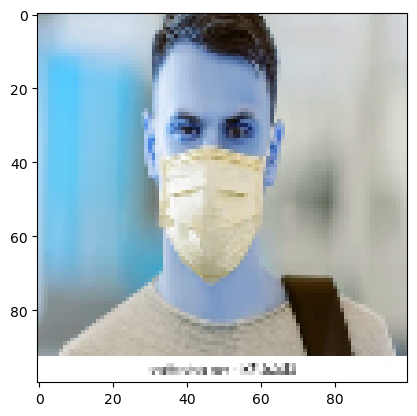

In [39]:
img1=cv2.imread(r"C:\Users\arunf\Data Science\young-man-background-open-air-260nw-1671464413.jpg")
img1=cv2.resize(img1,(100,100))
plt.imshow(img1)

In [40]:
img1.shape

(100, 100, 3)

In [41]:
img1=img1.reshape(1,100,100,3)

In [42]:
pred=model.predict(img1)
pred

1/1 [==============================] - 0s 38ms/step


array([[1., 0.]], dtype=float32)

In [43]:
index=np.argmax(pred)


In [44]:
for k,v in pic_class.items():
    if v==index:
        print('prediction:', k)

prediction: With Mask


**MODEL SAVING**

In [51]:
model.save('maskmodel1.h5')

**MASK DETECTION USING WEBCAM**

In [1]:
import cv2
from tensorflow import keras
import tensorflow as tf
import numpy as np

k_model=tf.keras.models.load_model('maskmodel1.h5')

haar_data=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [2]:

cap=cv2.VideoCapture(0)

labels_dict={0: 'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

while True:
    flag,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar_data.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,3))
        result=k_model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(128,0,128),2)
    cv2.imshow('LIVE',img)
    if cv2.waitKey(10)==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 62ms/step
